## Simple Example Fetching Data Using Alpha Vantage API in Python

https://www.alphavantage.co/documentation/

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries
api_key = os.environ.get('ALPHAVANTAGE_API_KEY')

## Alpha Vantage API Request Method Example

In [4]:
FUNCTION = "TIME_SERIES_INTRADAY"
SYMBOL = "IBM"
INTERVAL = "5min"
sp500 = yf.Tickers('^GSPC')  # Tickers symbol for S&P 500 index
print (sp500)

yfinance.Tickers object <^GSPC>


### Getting Intraday Trading Data

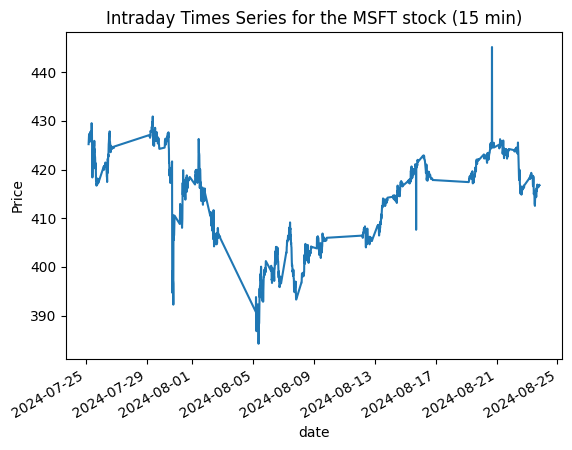

In [5]:
key = os.environ.get('ALPHAVANTAGE_API_KEY')
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='15min', outputsize='full')
X = data['4. close']
X.plot()
plt.title('Intraday Times Series for the MSFT stock (15 min)')
plt.ylabel('Price')
plt.show()

In [6]:
ts = TimeSeries(key='api_key', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='IBM',interval='15min', outputsize='full')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-23 19:45:00,196.110,196.140,195.950,196.110,85.0
2024-08-23 19:30:00,196.100,196.400,195.950,196.100,30.0
2024-08-23 19:15:00,196.400,196.400,195.960,196.100,120.0
2024-08-23 19:00:00,196.100,196.100,196.100,196.100,456225.0
2024-08-23 18:45:00,196.097,196.097,196.097,196.097,4.0
...,...,...,...,...,...
2024-07-25 05:00:00,189.850,190.247,189.836,190.032,505.0
2024-07-25 04:45:00,190.148,190.247,189.826,189.833,74.0
2024-07-25 04:30:00,189.216,190.286,188.875,190.131,1600.0


<Axes: xlabel='date'>

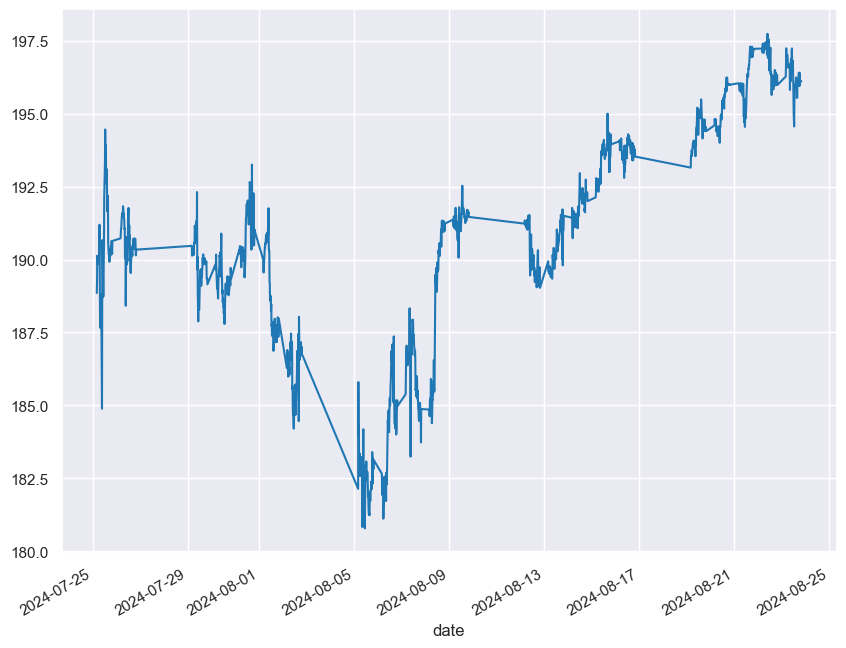

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")
data.describe()
data['4. close'].plot(figsize=(10,8))


### Get Daily Time Series Data 

In [8]:
data, meta_data = ts.get_daily(symbol='IBM')
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-23,196.79,197.380,194.390,196.10,2321961.0
2024-08-22,197.25,197.920,195.570,195.96,1969496.0
2024-08-21,195.97,197.330,194.115,197.21,2579343.0
2024-08-20,194.59,196.210,193.750,196.03,1790371.0
2024-08-19,193.84,195.525,193.715,194.73,2361378.0


In [11]:
data, meta_data = ts.get_daily_adjusted(symbol='IBM')
data.head()

ValueError: Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints

### Get Weekly Time Serie Data 

In [ ]:
data, meta_data = ts.get_weekly(symbol='IBM')
data.head()

In [ ]:
data, meta_data = ts.get_weekly_adjusted(symbol='IBM')
data.head()

### Get Monthly Time Serie Data 

In [ ]:
data, meta_data = ts.get_monthly(symbol='IBM')
data.head()

### Get Latest Quotes with Alpha Vantage

In [ ]:
data, meta_data = ts.get_quote_endpoint(symbol='IBM')
data.head()

### Search Symbols Information with Alpha Vantage

In [ ]:
data, meta_data = ts.get_symbol_search('BA')
data.head()

## Alpha Vantage Alpha Intelligence Endpoint

### Get Stock News and Sentiments with Alpha Vantage

In [ ]:
function = "NEWS_SENTIMENT"
tickers = "IBM"
topics = "technology"
url = "https://www.alphavantage.co/query?function=" +function+"&tickers="+tickers+"&topics="+topics+"&apikey="+api_key
r = requests.get(url)
data = r.json()
pd.DataFrame(data['feed']).head(3)


In [ ]:
i = 0
print(df['title'].iloc[i])
print(df['summary'].iloc[i])
print(df['overall_sentiment_score'].iloc[i])
print(df['overall_sentiment_label'].iloc[i])

## Alpha Vantage Fundamental Data Endpoint

### Get Company Overview with Alpha Vantage

In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData
fd = FundamentalData(key=api_key)
data = fd.get_company_overview('IBM')
data

### Get Company Annual Earnings

In [ ]:
function = "EARNINGS"
symbol = "IBM"
url = "https://www.alphavantage.co/query?function="+ function +"&symbol="+symbol+"&apikey="+api_key
r = requests.get(url)
data = r.json()
data

### Get A List of All Stocks 

In [ ]:
CSV_URL = 'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey='+api_key
df = pd.read_csv(CSV_URL)
df.head(10)

## Alpha Vantage Forex Endpoint

### Get Forex Exchange Rates with Alpha Vantage

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
fe = ForeignExchange(key=api_key)
data = fe.get_currency_exchange_rate('EUR', 'USD')
data

### Get Historical Exchange Rates with Alpha Vantage

In [ ]:
fe = ForeignExchange(key=api_key, output_format='pandas')
data, meta_data = fe.get_currency_exchange_daily('EUR', 'USD', outputsize='compact')
data.head()

## Alpha Vantage Cryptocurrencies Endpoint

### Get Cryptocurrencies Exchange Rates with Alpha Vantage

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key=api_key)
data = cc.get_digital_currency_exchange_rate('BTC', 'USD')
data

### Get Historical Cryptocurrencies Data with Alpha Vantage

In [ ]:
cc = CryptoCurrencies(key=api_key, output_format = 'pandas')
data, meta_data = cc.get_digital_currency_daily('BTC', 'CNY')
data.head()

In [ ]:
data, meta_data = cc.get_digital_currency_monthly('BTC', 'CNY')
data.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")

data['4b. close (USD)'].plot(figsize=(10,8))

## Alpha Vantage Technical Indicators Endpoint

### Get Weighted Moving Average with Alpha Vantage

In [ ]:
from alpha_vantage.techindicators import TechIndicators
ti = TechIndicators(key=api_key, output_format = 'pandas')
data, meta_data = ti.get_wma(symbol='AAPL', interval='60min', time_period=60)
data.head(10)

### Plot Kaufman Adaptive Moving Average (KAMA) with Alpha Vantage

In [ ]:
sns.set_style("darkgrid")
sns.set_context("poster")
data, meta_data = ti.get_kama(symbol='AAPL', interval='daily', time_period=60)
data.plot(figsize=(10,8))
plt.title('KAMA indicator for  AAPL stock (Daily)')
plt.show()

## Alpha Vantage Economic Indicators Endpoint

### Get Yearly USA Inflation Rates with Alpha Vantage

In [ ]:
function = "INFLATION"
url = "https://www.alphavantage.co/query?function="+ function +"&apikey="+ api_key
r = requests.get(url)
data = r.json()

pd.DataFrame(data['data']).head(10)

### Get Monthly Customer Sentiment Information with Alpha Vantage

In [ ]:
function = "CONSUMER_SENTIMENT"
url = "https://www.alphavantage.co/query?function="+ function +"&apikey="+ api_key
r = requests.get(url)
data = r.json()
data
#pd.DataFrame(data['data']).head(10)

## Sector Performance Endpoint

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances
sp = SectorPerformances(key=api_key, output_format = 'pandas')
data, meta_data = sp.get_sector()
data